# FINAL TEST PYTHON
***
# <center> Tunggal Manda Ary Triyono
# ---------------------------------------------------------------------------------------------------------------

# 1.  Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision Tree

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# 2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Import loan_data.csv.
>Identifikasi tipe data dari masing-masing variable.
<br>Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

In [4]:
df = pd.read_csv('loan_data.csv')

# 4. Lakukan pengecekan missing data dan duplicated-row.
>Jika ada, sebutkan kolom apa yang ada missing data.
<br>Apakah ada duplicated-row?

In [202]:
print("Jumlah Missing Value :")
print(df.isna().sum())

Jumlah Missing Value :
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [196]:
print("Jumlah Duplicated Row :",df.duplicated().sum())

Jumlah Duplicated Row : 0


# 5. Lakukan pengecekan variabel target.
 >Ada berapa kategori pada variable target?
 <br>Berapa proporsinya?
 <br>Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

In [35]:
print("jumlah kategori pada variable target :", df['not.fully.paid'].nunique())

jumlah kategori pada variable target : 2


In [207]:
print("Proporsi target 1 : {}\nproporsi target 0 : {}".
      format(df['not.fully.paid'].value_counts()[1],
             df['not.fully.paid'].value_counts()[0]))

Proporsi target 1 : 1533
proporsi target 0 : 8045


In [208]:
len(df['not.fully.paid'])

9578

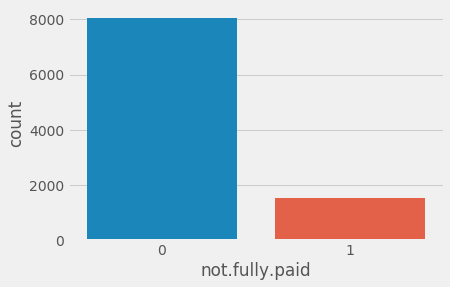

In [209]:
sns.countplot(df['not.fully.paid'])

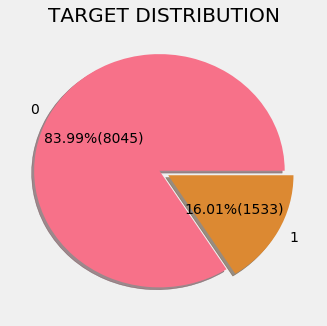

In [211]:
#Visualisasi Proporsi
plt.style.use('fivethirtyeight')
data = df
unique_count = dict(data['not.fully.paid'].value_counts())
a = pd.DataFrame({'not.fully.paid':data['not.fully.paid'].unique()})   

a['not.fully.paid'] = a['not.fully.paid'].apply(lambda x: unique_count[x])
colors=sns.color_palette("husl", 10)
target = pd.Series(a['not.fully.paid'],name='')
plt.figure(figsize=(5,5))
target.plot(kind='pie', title='TARGET DISTRIBUTION',
            autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*data['not.fully.paid'].count()),
            colors=colors, shadow=True, explode=[0.04,0.04]);

# 6. Berapa variansi (ragam) nilai installment?

In [51]:
import numpy as np 
print("variansi (ragam) nilai installment :" , round(np.var(df['installment']),2))

variansi (ragam) nilai installment : 42874.05


# 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [60]:
# First quartile (Q1) 
Q1 = df['installment'].describe()[4]
  
# Third quartile (Q3) 
Q3 = df['installment'].describe()[6]
  
# Interquartile range (IQR) 
IQR = round(Q3 - Q1 ,2)

print("IQR :",IQR)

IQR : 268.99


# 8.  Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [72]:
ins_pur = df[['installment','purpose']].groupby('purpose').max().sort_values('installment', ascending = False)
ins_pur

,installment
purpose,
debt_consolidation,940.14
small_business,926.83
credit_card,922.42
all_other,916.95
home_improvement,902.06
major_purchase,898.55
educational,861.88


# 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.

>Ada berapa kategori pada variable tersebut?
<br>Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [77]:
print("kategori pada variable purpose :" ,df['purpose'].nunique())

kategori pada variable purpose : 7


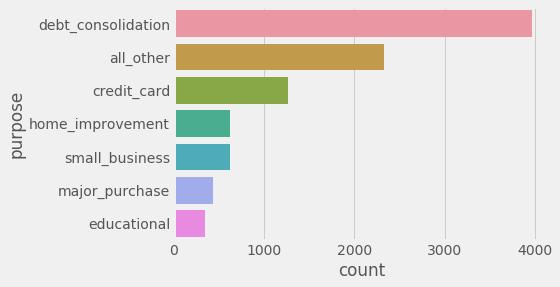

In [112]:
pur = pd.DataFrame(df['purpose'].value_counts())
sns.countplot(y = df['purpose'], order=pur.index);

# 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. 
### <br>Hint: Visualisasikan distribusi ‘fico’ terhadap target.

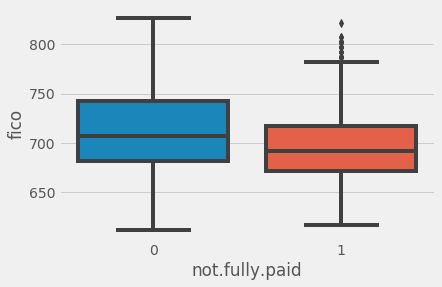

In [111]:
sns.boxplot(df['not.fully.paid'],df['fico']);

In [121]:
df['not.fully.paid'].corr(df['fico'])

-0.1496663030748377

***
Variabel fico bukan merpakan predictor yang baik karena tidak terlalu membedakan mana orang yang bayar loan atau tidak, dan karakteristik variabel fico saat data = 1 dan data = 0 tidak berbeda jauh 
<br>Selain itu korelasi kedua tabel tersebut juga kecil
***

# 11. Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.
>Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

In [215]:
pur_not = pd.crosstab(df['purpose'],df['not.fully.paid'])
pur_not

not.fully.paid,0,1
purpose,,
all_other,1944,387
credit_card,1116,146
debt_consolidation,3354,603
educational,274,69
home_improvement,522,107
major_purchase,388,49
small_business,447,172


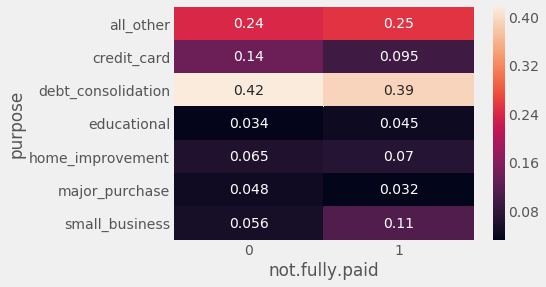

In [217]:
norm = pd.crosstab(df['purpose'],df['not.fully.paid'], normalize='columns')
sns.heatmap(norm, annot=True)

In [126]:
df['not.fully.paid'].corr(df['purpose'], method='spearman')

0.03612826836531154

***

Variabel Purpose tidak cukup potensial untuk menjadi predictor karena dilihat dari hasil crosstabnya, variabel ini cenderung mengaktegorikan orang sebagai target 0. Dilihat dari heatmapnya, variabel ini juga tidak terlalu dapat membedakan target 0 dan 1.Selain itu korelasi antar kedua variabel tersebut kecil yakni 0.36
***

# 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [135]:
print("Nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card :", df[df['purpose']=='credit_card']['int.rate'].mean())

Nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card : 0.11973819334389857


# 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [138]:
print("Jumlah Kasus Pnjaman :",df[(df['installment'] > 200) & (df['purpose']=='educational')]['int.rate'].count())

Jumlah Kasus Pnjaman : 137


# 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [139]:
loans3 = df[df['purpose']=='credit_card']

loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


# 15 Siapkan data untuk pemodelan.

>Ubah data kategorik menjadi dummy variabel.
<br>Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [147]:
df_purpose = pd.get_dummies(df['purpose'])
final_data = pd.concat([df,df_purpose],axis = 1)

final_data.drop('purpose', axis=1, inplace=True)

In [149]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [148]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

# 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [188]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [189]:
y_pred = dtree.predict(X_test)

In [190]:
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [195]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1976  455]
 [ 338  105]]


Confussion matrix : 
<br>|True Positive |False Positive|
<br>|False Negative|True Negative|

# 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [192]:
#####from confusion matrix calculate accuracy
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy    : ', round(accuracy*100,2))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', round(sensitivity*100,2))

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', round(specificity*100,2))

Accuracy    :  72.41
Sensitivity :  81.28
Specificity :  23.7


***
Akurasi adalah rasio benar prediksi degan keseluruhan data
<br>Sensitivity adalah prediksi benar(positif) dibandingkan dengan keseluruhan data yang benar positif
<br>Specificity adalah Rasio prediksi negatif dibandingkan dengan keseluruhan data negative
<br>Dari hasil evaluasi diatas model tersebut kurang bagus karena karena nilai akurasi yang tidak terlalu tinggi dan specificity yang sangat rendah
***